In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
#dividing into dependent and independent variables
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [8]:
x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [9]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [13]:
# here there is a categorical variable - we convert it to numberical using Feature Encoding - OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
X = np.array(ct.fit_transform(x))

In [15]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [17]:
len(X_train)

40

In [18]:
len(X_test)

10

In [20]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
X_train

array([[-0.69388867, -0.69388867,  1.36277029, -0.65849451, -1.24510732,
        -0.15567225],
       [ 1.44115338, -0.69388867, -0.73379939, -1.68754982, -0.12007008,
        -1.595658  ],
       [-0.69388867, -0.69388867,  1.36277029, -0.07493895,  0.26323125,
         1.17045415],
       [-0.69388867, -0.69388867,  1.36277029,  1.00825725,  0.99787905,
         0.79712718],
       [-0.69388867, -0.69388867,  1.36277029,  0.03545868, -0.743683  ,
        -0.73889589],
       [-0.69388867, -0.69388867,  1.36277029, -1.23513625, -1.91793479,
        -0.33755161],
       [-0.69388867, -0.69388867,  1.36277029,  1.54118775, -0.06060434,
         1.44001323],
       [-0.69388867,  1.44115338, -0.73379939,  1.74400866, -0.67801159,
         1.66214692],
       [-0.69388867,  1.44115338, -0.73379939, -0.17725559, -0.51577217,
         0.73565912],
       [ 1.44115338, -0.69388867, -0.73379939, -0.24139138,  0.67499144,
        -0.76235485],
       [-0.69388867, -0.69388867,  1.36277029, -1.

In [22]:
X_test

array([[-0.69388867,  1.44115338, -0.73379939,  0.99485498,  1.27365627,
         0.30229444],
       [ 1.44115338, -0.69388867, -0.73379939, -1.19156792,  1.21231537,
        -1.74687589],
       [-0.69388867,  1.44115338, -0.73379939, -0.44648581, -0.61065878,
        -0.07379487],
       [-0.69388867,  1.44115338, -0.73379939,  0.36432394, -0.21898917,
         0.64720805],
       [-0.69388867, -0.69388867,  1.36277029,  0.24513616,  1.16680042,
        -2.00133784],
       [ 1.44115338, -0.69388867, -0.73379939, -0.82522917, -1.31786438,
        -0.42974435],
       [-0.69388867, -0.69388867,  1.36277029, -1.66518072,  0.13248413,
        -1.98423946],
       [ 1.44115338, -0.69388867, -0.73379939, -0.26947715,  0.31096659,
        -1.58746601],
       [ 1.44115338, -0.69388867, -0.73379939, -1.15884521, -0.85259613,
        -0.67220348],
       [-0.69388867, -0.69388867,  1.36277029,  2.01031166,  0.58144982,
         2.23555237]])

In [24]:
#Create LR Model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [26]:
regressor.coef_

array([  115.25237468,   770.37678783,  -869.67057318, 36396.19640191,
        -771.40509292,  4007.74292429])

In [27]:
regressor.intercept_

np.float64(113797.15750000002)

In [28]:
#Predictions - passing X_test data)
y_pred = regressor.predict(X_test)

In [29]:
y_pred

array([151903.53071707,  62762.10619464,  99390.50911782, 131488.35867086,
       111998.56867365,  83325.96130717,  43336.70306691,  97656.88167665,
        69852.98237722, 193676.15226492])

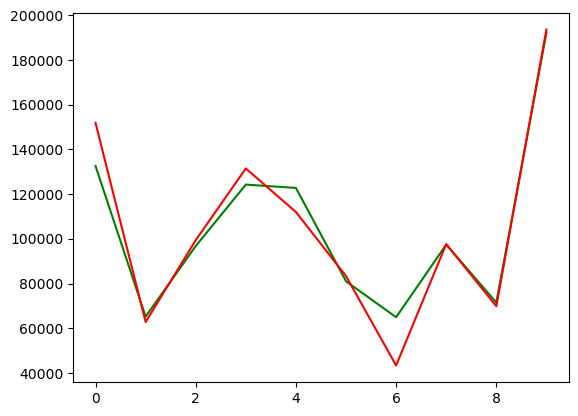

In [32]:
#plotting y-test vs y-pred
plt.plot(y_test, color = 'green', label = 'test')
plt.plot(y_pred, color = 'red', label = 'train')
plt.show()

In [37]:
#predicting by uploading a new row -
data = [[1.0,0.0,0.0,80000,125000,250000]]
df1 = pd.DataFrame(data)

In [38]:
df1

,0,1,2,3,4,5
0,1.0,0.0,0.0,80000,125000,250000


In [39]:
df1 = sc.transform(df1)
df1

array([[ 1.44115338, -0.69388867, -0.73379939,  0.1015663 ,  0.16232039,
         0.2438047 ]])

In [40]:
pred = regressor.predict(df1)
pred

array([118615.38063095])